In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

In [4]:
df = pd.read_csv('Dados/aluguel_duas_variaveis_com_ruido.csv')
df['Preco'] = df['Preco'].round()
print(df)

     Area  Quartos   Preco
0     132        2  3787.0
1     136        5  4694.0
2     101        3  3473.0
3     218        1  5453.0
4      50        3  2590.0
..    ...      ...     ...
995   194        1  4912.0
996   182        3  4811.0
997   105        5  4061.0
998   116        1  3593.0
999   146        4  4864.0

[1000 rows x 3 columns]


In [5]:
X = df[['Area', 'Quartos']]
y = df['Preco']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Área
model_area = LinearRegression()
model_area.fit(X_train[['Area']], y_train)

# Quartos
model_quartos = LinearRegression()
model_quartos.fit(X_train[['Quartos']], y_train)

LinearRegression()

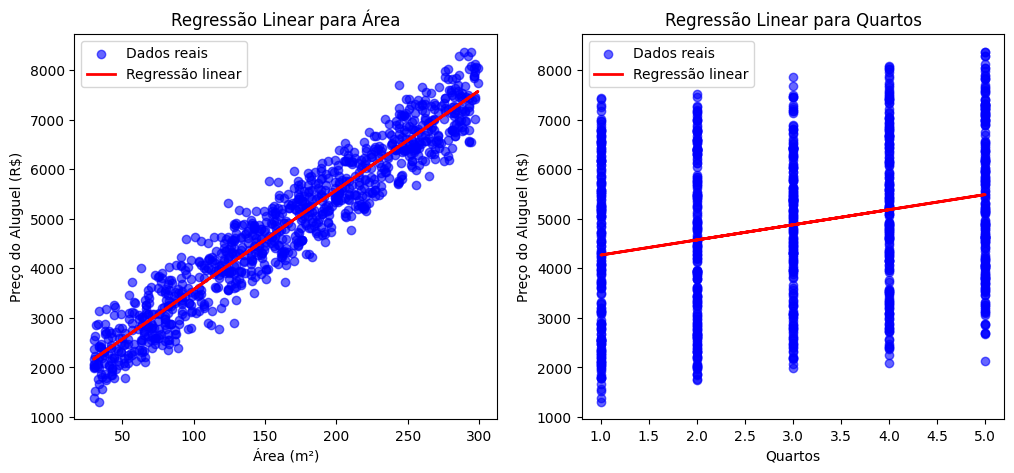

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Área
axes[0].scatter(X['Area'], y, c='blue', label='Dados reais', alpha=0.6)
axes[0].plot(X['Area'], model_area.predict(X[['Area']]), color='red', label='Regressão linear', linewidth=2)
axes[0].set_xlabel('Área (m²)')
axes[0].set_ylabel('Preço do Aluguel (R$)')
axes[0].set_title('Regressão Linear para Área')
axes[0].legend()

# Quartos
axes[1].scatter(X['Quartos'], y, c='blue', label='Dados reais', alpha=0.6)
axes[1].plot(X['Quartos'], model_quartos.predict(X[['Quartos']]), color='red', label='Regressão linear', linewidth=2)
axes[1].set_xlabel('Quartos')
axes[1].set_ylabel('Preço do Aluguel (R$)')
axes[1].set_title('Regressão Linear para Quartos')
axes[1].legend()

plt.show()

In [13]:
# Área
y_pred_area = model_area.predict(X_test[['Area']])
r2_area = r2_score(y_test, y_pred_area)
print(f"R² para 'Área': {r2_area:.2f}")

# Quartos
y_pred_quartos = model_quartos.predict(X_test[['Quartos']])
r2_quartos = r2_score(y_test, y_pred_quartos)
print(f"R² para 'Quartos': {r2_quartos:.2f}")

R² para 'Área': 0.93
R² para 'Quartos': 0.03
